<a href="https://colab.research.google.com/github/CodeWithSriram482/AI-Driven-Customer-Intelligence-Engine/blob/main/AI_Driven_Customer_Intelligence_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Driven Customer Intelligence Engine

Problem:

Businesses often struggle to understand customer purchasing behavior when dealing with diverse income levels and spending patterns. Without structured segmentation, it becomes difficult to identify distinct customer groups and tailor marketing strategies effectively. In this project, customer data containing attributes such as annual income and spending score was analyzed to uncover hidden behavioral patterns. Since predefined labels were not available, a data-driven clustering approach was applied to segment customers into meaningful groups based on their similarities. The objective was to transform raw customer data into actionable intelligence, enabling better targeting, improved sales strategies, and more informed business decision-making

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV datasets/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
df = df.drop('CustomerID', axis=1)


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe(include = 'all')

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [ ]:
df.isnull().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


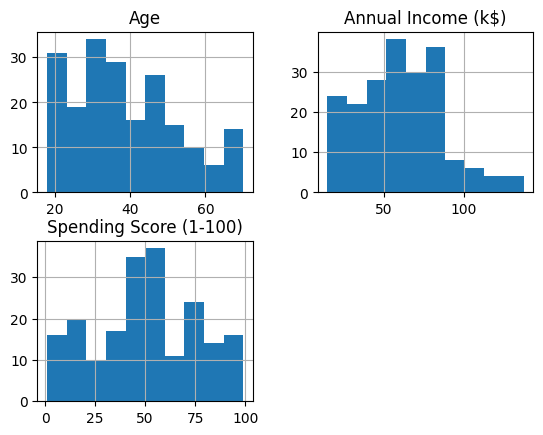

In [ ]:
df.hist()
plt.show()

In [ ]:
#df['Age'].value_counts()

In [ ]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df.nunique()

,0
Genre,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Univariate Analysis:

hist/dist/kde plots(Numerical-Continous variables)

Count/Bar plots(Categorical variables)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
cat_cols

['Genre']

In [ ]:
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Axes: xlabel='count', ylabel='Genre'>

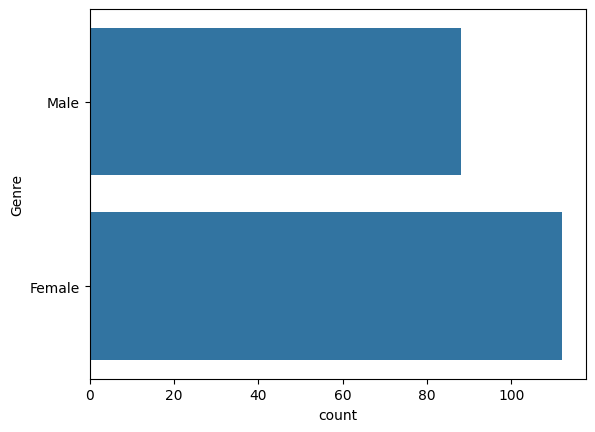

In [ ]:
sns.countplot(df['Genre'])

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

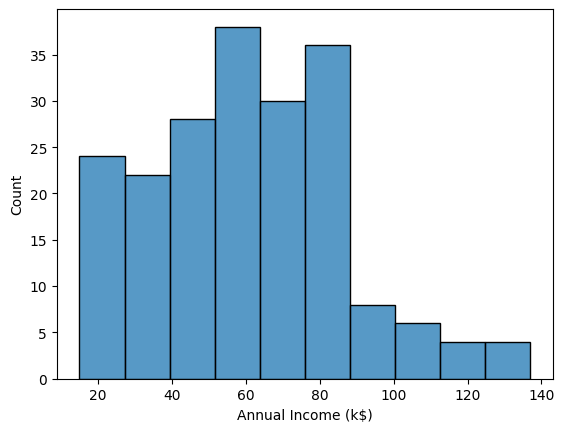

In [ ]:
sns.histplot(df['Annual Income (k$)'])

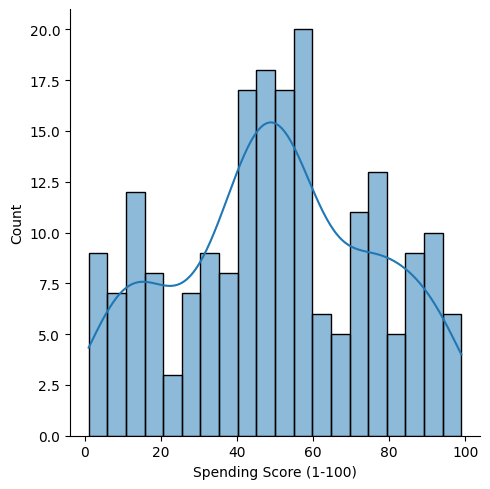

In [ ]:
sns.displot(df, x='Spending Score (1-100)', kind='hist', kde=True, bins=20)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

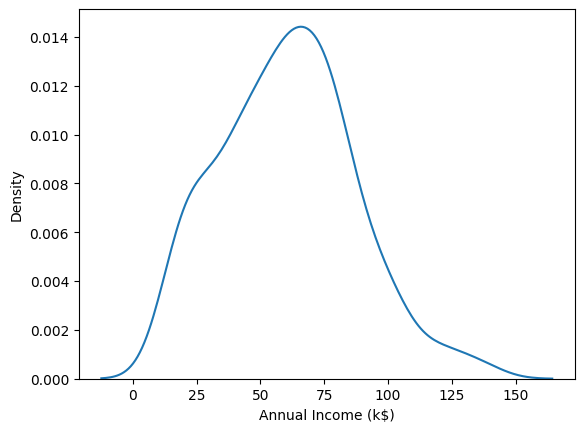

In [ ]:
sns.kdeplot(df['Annual Income (k$)'])

Bi-variate Analysis:

Scatterplots(for continuous vs.continuous),

BoxPlots(for categorical vs continous),

crosstab(for stackedbarplots for categorical vs categorical)

In [ ]:
cat_cols

['Genre']

In [ ]:
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

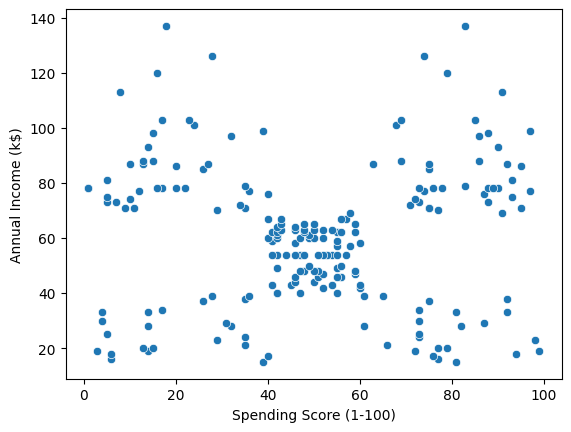

In [ ]:
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

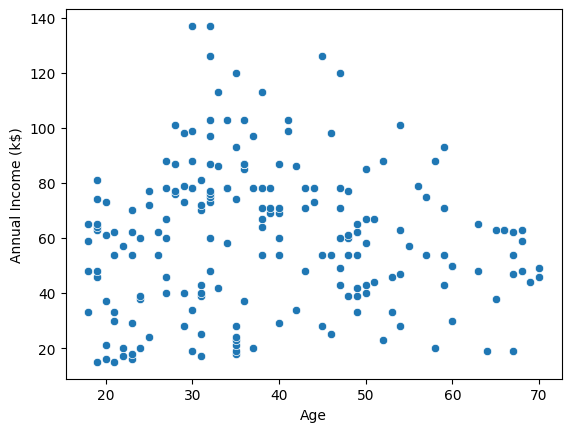

In [ ]:
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

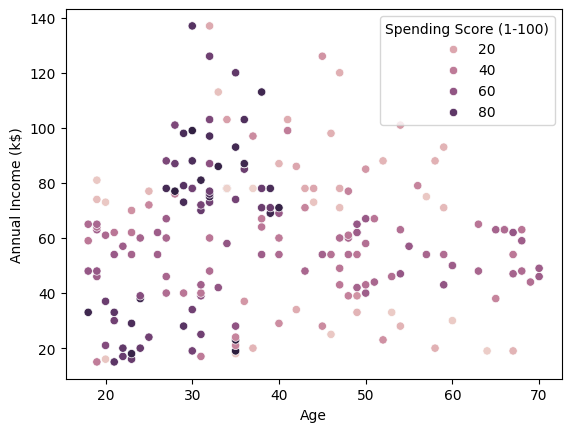

In [ ]:
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)",hue="Spending Score (1-100)")

Age around 40 with income around 80K spending more with spending score of 80

<Axes: xlabel='Genre', ylabel='Annual Income (k$)'>

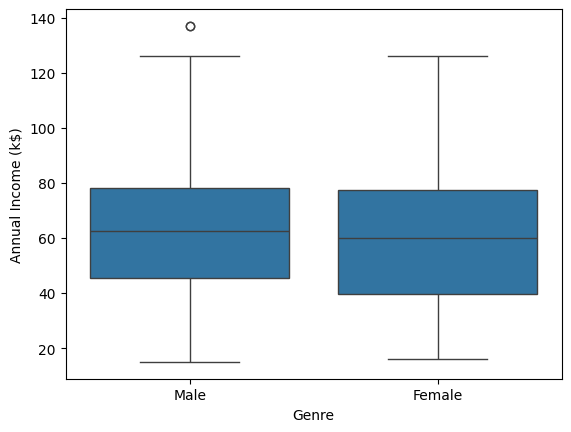

In [ ]:
sns.boxplot(data=df,x="Genre",y="Annual Income (k$)")#cat vs num


<Axes: >

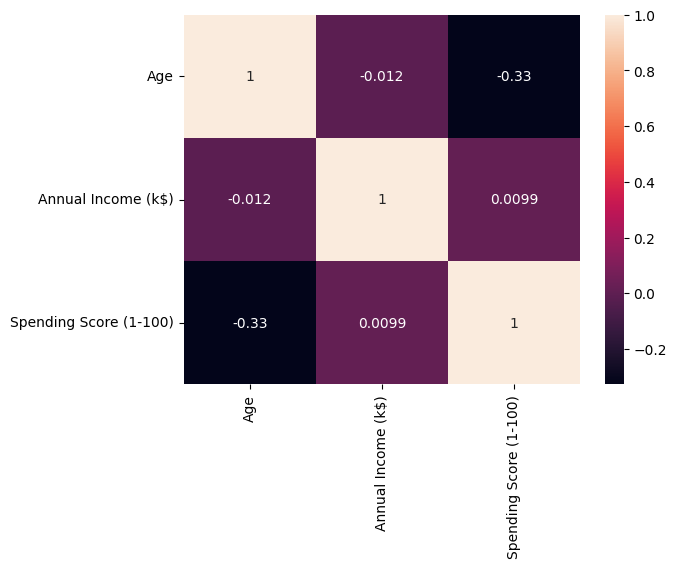

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True)

 negative correlation (a negative value), it means that as one variable increases, the other decreases, and vice versa

 from graph:

 if age inc--spending score dec / viceversa --so -ve corr(-0.33)


 postive corr as one variable increases, the other tends to increase as well, and they move in the same direction.

 so imp features are 2 only (+ve corr)-build clustering model on these

Multi-variate Analysis:

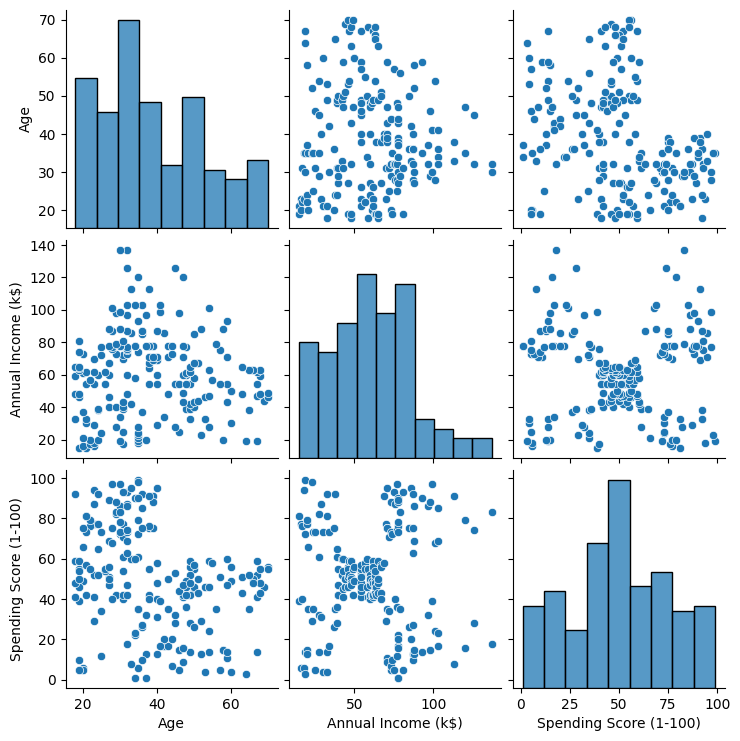

In [ ]:
sns.pairplot(df)

# 2.Pre-Processing

In [ ]:
df.isnull().sum()/len(df)*100

,0
Genre,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


In [ ]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Convert Gender to Numeric (optional)

In [ ]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Select Features for Clustering

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]#Select Features for Clustering
#X = df.iloc[:,[3,4]].values

In [ ]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()#n_clusters=8 is used by default in scikit-learn's KMeans.
kmeans.fit(X_scaled)

KMeans()

In [ ]:
kmeans.predict(X_scaled)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 2, 0, 2, 0,
       6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 2, 0, 6, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 7, 0, 7, 0, 7, 0, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

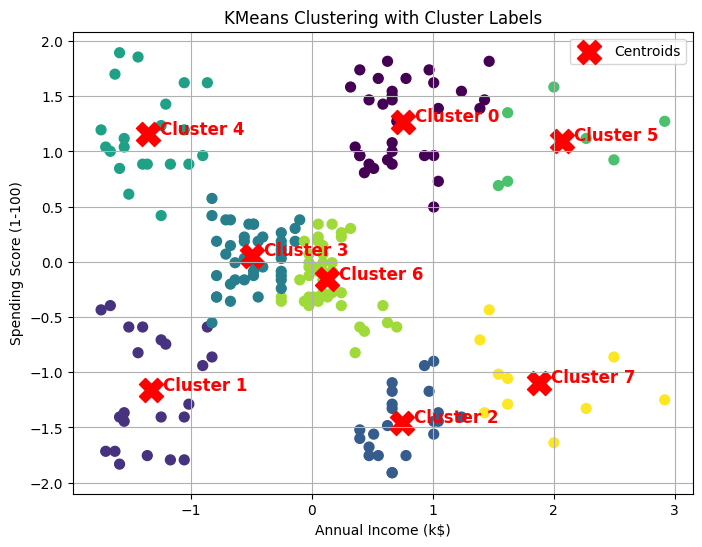

In [ ]:
import matplotlib.pyplot as plt

# Use predicted labels from KMeans
labels = kmeans.labels_

# Scatter plot of the data points colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')

# Annotate each centroid with the cluster label
for i, (x, y) in enumerate(kmeans.cluster_centers_):#i is the cluster index → 0, 1, 2, ...and (x, y) is unpacking the 2D coordinates of each centroid(x= x-coord,y=y-coord)
    plt.text(x + 0.1, y, f'Cluster {i}', fontsize=12, fontweight='bold', color='red')#x + 0.1 is used to slightly shift the position of the text label

# Label axes with actual feature names
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering with Cluster Labels')
plt.legend()
plt.grid(True)
plt.show()


# Elbow Method for Optimal Clusters

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#init='k-means++' means the initialised centroids are very far from each other-To avoid poor clustering results caused by bad random centroid initialization

#.inertia_ gives the dt bt centroid and all other pts with in a cluster

In [ ]:
wcss

[399.99999999999994,
 273.66888662642003,
 157.70400815035939,
 109.22822707921345,
 65.56840815571681,
 60.132874871934206,
 49.668244837367965,
 37.31912287833882,
 32.495081199100916,
 30.05932269404222]

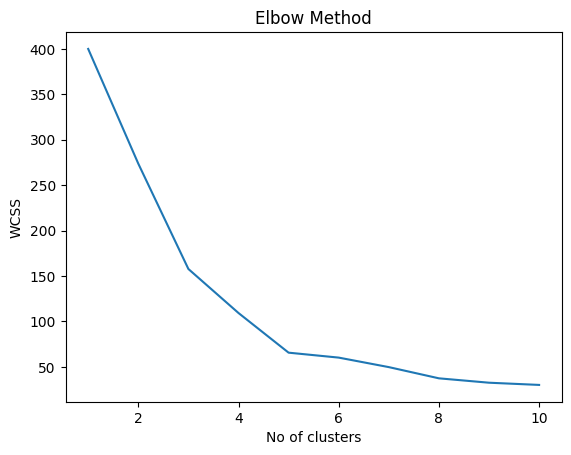

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()


 k = 5, the curve flattens

# Model Training-Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


In [ ]:
labels = kmeans.labels_  # after you've done fit_predict()
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Visualize Clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

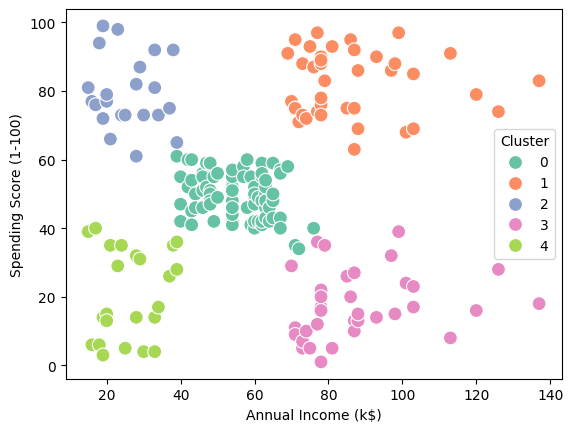

In [ ]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Cluster',palette='Set2', s=100)

cluster centroids

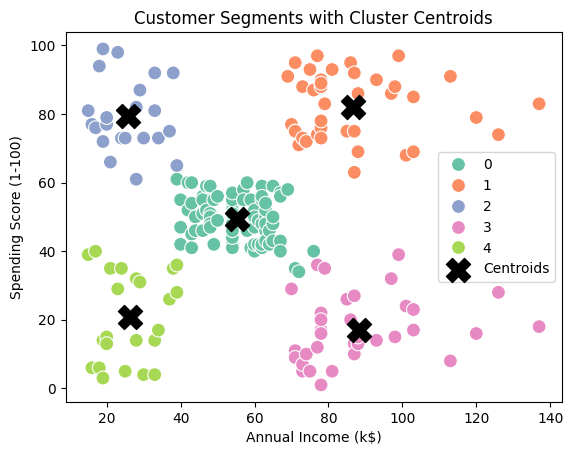

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scatterplot with clusters
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='Set2',
                s=100)

# Get centroids (assuming kmeans was fit on scaled data)
# You might need to inverse transform if original features were scaled
centroids = kmeans.cluster_centers_

# If data was scaled, inverse transform to plot in original scale:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
centroids_original = scaler.inverse_transform(centroids)
#we trained model on scaled data , so to get original centroid values in a cluster we need to do inverse operation for viz of centroids(translate the cluster centroids back to the original feature scale)

# Plot centroids
plt.scatter(centroids_original[:, 0],
            centroids_original[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.legend()
plt.title('Customer Segments with Cluster Centroids')
plt.show()


In [ ]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


Cluster 0: Older customers with moderate income and average spending behavior.

Cluster 1: Young adults with high income and high spending — likely premium customers.

Cluster 2: Very young, low-income customers who spend heavily — potential impulsive buyers.

similar for remaining clusters

# Metrics-Silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette Score
silhouette = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5546571631111091


Comparing k=5 with silhoute score of 0.55 is performes good clustering balanced model(not over or under fit) good clustering done

so k=5 clusters is perfect wrt silhoute score

Silhouette Score for k=2: 0.3973
Silhouette Score for k=3: 0.4666
Silhouette Score for k=4: 0.4943
Silhouette Score for k=5: 0.5547
Silhouette Score for k=6: 0.5138
Silhouette Score for k=7: 0.5020
Silhouette Score for k=8: 0.4550
Silhouette Score for k=9: 0.4567
Silhouette Score for k=10: 0.4448


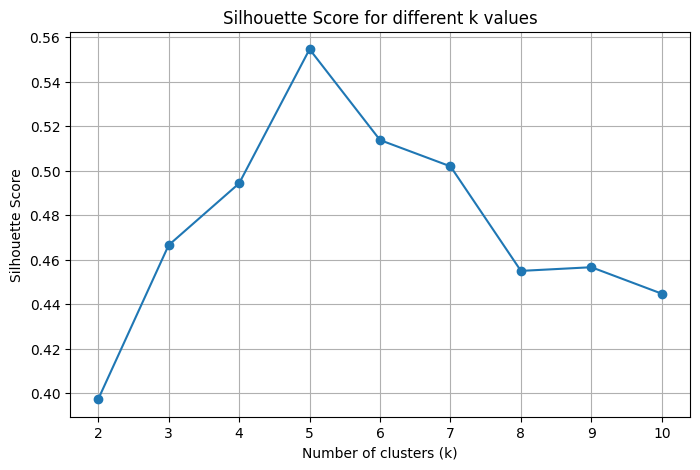

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume X is your dataset
# If not already scaled, scale it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of k
silhouette_scores = []
K = range(2, 11)  # Try k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Plot Silhouette Score vs k
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k values')
plt.grid(True)
plt.show()


if k<4--underfitting-clusters are too broad.

if k>5-- overfitting-over complicating the model with too many clusters.

Clustering Evaluation using silhouette analysis

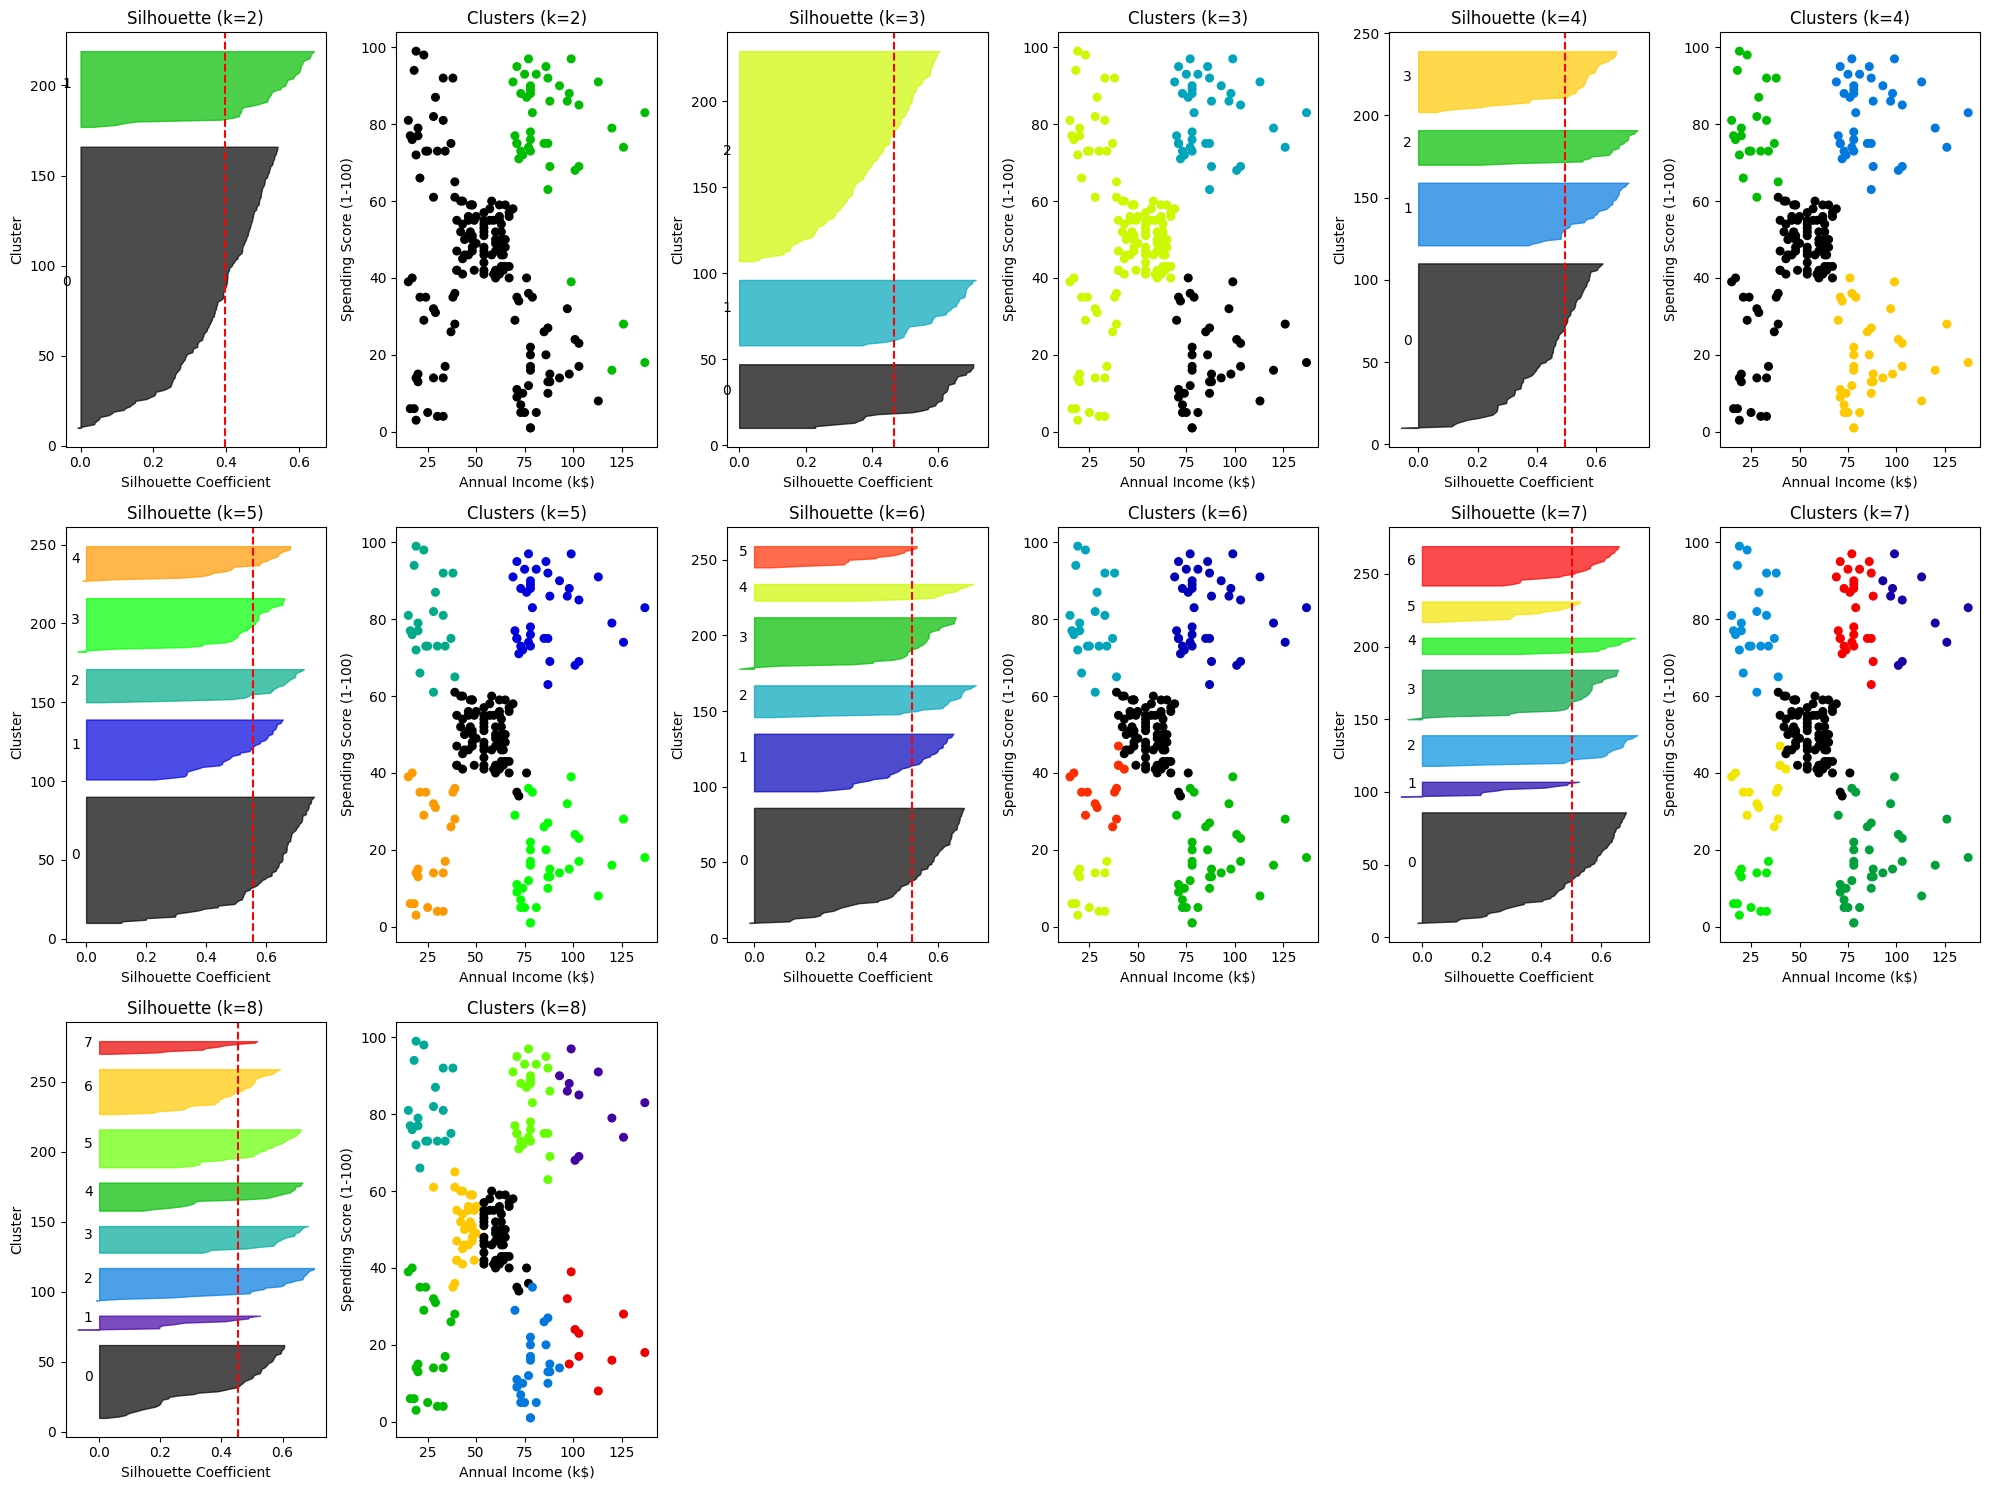

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Select features
X_selected = X[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Range of k values
k_values = range(2, 9)
plots_per_row = 3

# Create subplots (adjusting the number of rows to avoid empty boxes)
n_rows = (len(k_values) + plots_per_row - 1) // plots_per_row  # Rounded up division
fig, axes = plt.subplots(nrows=n_rows, ncols=2 * plots_per_row, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    # Silhouette values
    silhouette_vals = silhouette_samples(X_scaled, labels)# cal silhouette scores
    silhouette_avg = silhouette_score(X_scaled, labels)#The average score tells us how well the data is clustered (closer to 1 is better).

    # Silhouette plot-#select the **subplot axis**,Each value of `k` gets **two plots** (one silhouette, one scatter)
    ax_sil = axes[2 * idx]#So silhouette plots go in even-numbered positions: `0, 2, 4,...` → `2 * idx`.
    y_lower = 10
    for i in range(k):#Loop over each cluster index i from 0 to k - 1.
        ith_cluster_sil_vals = silhouette_vals[labels == i]#Select silhouette values of only those points **assigned to cluster `i`**.
        ith_cluster_sil_vals.sort()#Sort values to create a layered bar plot
        y_upper = y_lower + len(ith_cluster_sil_vals)#- Determine how **tall this cluster’s block** should be in the y-axis.
                                                      #- Each point gets **1 row**, so the height = number of points in that cluster.

        color = plt.cm.nipy_spectral(float(i) / k)#value i / k ensures colors are evenly spaced.

        ax_sil.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals, facecolor=color, edgecolor=color, alpha=0.7)
        #fill_betweenx(y, x1, x2) fills horizontal bars between x=0 and the silhouette values for each point.
        #np.arange(y_lower, y_upper) creates a vertical range matching the number of points.
        #Each line segment is like a horizontal bar representing the silhouette score for one point.
        #Higher scores (closer to 1) = better fit inside the cluster.
        #Negative values = possibly misclassified points.
        ax_sil.text(-0.05, y_lower + 0.5 * len(ith_cluster_sil_vals), str(i))
        #Write the cluster index next to its block.
        #-0.05 puts it slightly to the left.
        #Vertically placed in the middle of the cluster block.
        y_lower = y_upper + 10#Add spacing (10 units) between clusters vertically.

    ax_sil.axvline(x=silhouette_avg, color="red", linestyle="--")#Draws a red dashed vertical line at the average silhouette score for all points.
    ax_sil.set_title(f"Silhouette (k={k})")
    ax_sil.set_xlabel("Silhouette Coefficient")
    ax_sil.set_ylabel("Cluster")

    # Cluster plot
    ax_clust = axes[2 * idx + 1]#plotting Silhouette plot at index 2 * idx and Cluster plot at index 2 * idx + 1
    colors = plt.cm.nipy_spectral(labels.astype(float) / k)#spreads values between 0 and 1 to ensure distinct colors
    ax_clust.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=colors, s=30)#[:, 0]`: **Annual Income** (x-axis),[:, 1]`: **Spending Score** (y-axis)
    ax_clust.set_title(f"Clusters (k={k})")
    ax_clust.set_xlabel("Annual Income (k$)")
    ax_clust.set_ylabel("Spending Score (1-100)")

# Hide extra subplots if any
for i in range(2 * len(k_values), len(axes)):#If there are unused subplots (due to subplot grid layout), we turn them off.
    axes[i].axis('off')

# Clean layout
plt.tight_layout()
plt.show()


Red line -- average silhouette score for all the samples in that particular clustering configuration

for k=2:

The top cluster (green) has very high silhouette values — good cohesion.

The bottom cluster (gray) has lower silhouette values and even some close to 0 — suggesting possible overlap or poor separation.

vertical height(range of values upto 200) corresponds to the number of samples in that cluster (not a metric)

From viz of graphs its clear that

if k<4--underfitting-clusters are too broad.

if k>5-- overfitting-over
complicating the model with too many clusters.


In this silhouette plot(k=4,6,7), you can clearly see that some points have negative silhouette values (bars going left of 0-black line observe). This means those points are closer to another cluster(poor/over clustering) than the one they were assigned to.

✅ Interpretation Summary

Each horizontal bar = one data point’s silhouette score.

Taller cluster blocks = more points in that cluster.

Longer bars to the right = better fit.

Red dashed line = average score — higher is better.

Best silhouette plots:

All bars long and pointing right (values near 1)

No bars in negative

Clear separation between clusters

